# SDS-WAS regional dust forecasts

```{hint} 
<a href='https://dust.ltpy.adamplatform.eu/hub/user-redirect/lab/tree/02_model_forecasts/23_SDS-WAS_MONARCH_dust_forecast.ipynb' target='_blank'>Execute the notebook on the training platform >></a>
```

This notebook provides an introduction to dust forecast data from the MONARCH model. The notebook introduces you to the variable `Dust Optical Depth` and you will learn how the model has predicted the **Saharan Dust event** which occured over Europe in the first half of April 2024.

The <a href='https://community.wmo.int/en/activity-areas/gaw/science-for-services/sds-was' target='_blank'>WMO Sand and Dust Storm Warning Advisory and Assessment System (SDS-WAS)</a>. is an international framework linking institutions involved in <a href='https://community.wmo.int/en/activity-areas/aviation/hazards/dust-sand' target='_blank'> Sand and Dust Storm (SDS)</a> research, operations and delivery of services.

The framework is organised in several regional centers, which aim to implement SDS-WAS objectives in a specific region. The Barcelona Supercomputing Center (BSC-CNS) and the Meteorological State Agency of Spain (AEMET) are hosting the <a href='https://dust.aemet.es/' target='_blank'>SDS-WAS regional center for Northern Africa, Middle East and Europe</a>.

One of the main activities of the SDS-WAS regional center is to provide daily operational dust forecasts for Northern Africa (north of the equator), Middle East and Europe. The BCS-CNS, in collaboration with NOAA's National Centers for Environmental Prediction (NCEP), the NASA's Goddard Institute for Space Studies and the International Research Institute for Climate Society (IRI), has developed <a href='https://dust.aemet.es/about-us/monarch' target='_blank'>MONARCH</a>, an online multi-scale atmospheric dust model intended to provide short and medium-range dust forecasts for both, regional and global domains. 

The model provides forecast information up to 72 hours in advance (every 3 hours) of two parameters: `Dust Optical Depth` and `Dust Surface Concentration`.

MONARCH Forecast data are available in `netCDF` format and are available for download via a THREDDS Data Server <a href='https://dust.aemet.es/products/data-download' target='_blank'>here</a>.

```{admonition} Basic facts
**Spatial resolution**: `0.1° x 0.1°` <br>
**Spatial coverage**: `Northern Africa, Middle East and Europe` <br>
**Temporal resolution**:  `3-hourly up to 72 hours in advance` <br>
**Temporal coverage**: `since February 2012` <br>
**Data format**: `NetCDF`
```

```{admonition} How to access the data
Dust forecast data from the MONARCH model are available for download via the website of the <a href='https://sds-was.aemet.es/forecast-products/dust-forecasts/files-download' target='_blank'>WMO Barcelona Dust Regional Center</a>.

In order to be able to download data from the portal, you need to register via this <a href='https://dust.aemet.es/contact-info' target='_blank'>contact form</a>. Below, you see an example how you can programmatically download one data file.

Learn more about the data products and how to access them from this <a href='https://dust.aemet.es/products/user-guide' target='_blank'>user guide</a>.


```

<hr>

**Load required libraries**

In [3]:
import xarray as xr
import requests

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
from matplotlib.axes import Axes

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

from IPython.display import HTML

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

**Load helper functions**

In [4]:
%run ../functions.ipynb

<hr>

## Download MONARCH dust forecast data 

Data products from the WMO Barcelona Dust Regional Center can be accessed via a THREDDS Data Server. After registration, you received access credentials that you can use to access the data files. You can store your access credentials as variables, `user` and `password` respectively. Note: you have to replace the `#####` with your credentials.

In [ ]:
user='################'
password='###################'

The <a href='https://dust.aemet.es/products/data-download' target='_blank'>data catalog</a> offers public and restricted data. MONARCH dust forecasts are available as public data files. To get the download link for the dust forecast issued on 7 April 2024, you have to navigate to the following folder in the data catalog: `/BDRC_THREDDS_Public_Data/MONARCH/2024/04/`. If you click on the file for 7 April 2024, you get different download options. In the following, you see an example how you can use the Python library `requests` to download data from a given url.

First, let us store the url path of the data file as variable.

In [ ]:
url='https://dust.aemet.es/thredds/fileServer/dataRoot/MONARCH/2024/04/2024040712_3H_SDSWAS_NMMB-BSC-v2_OPER.nc'

Next, you can now establish a connection to the server where the data file is hosted, with the function `get()` from the requests package. You have to specify `auth` as keyword argument and give the function your access credentials (user, password).

Once a successful connection is established, you can open a new file and write the content of the server connection. The result is a netCDF data with a size of ~900 MB.

In [ ]:
r = requests.get(url, auth=(user,password))
open('./20240407_MONARCH_dust_forecast.nc', 'wb').write(r.content)

## Load and browse MONARCH dust forecast data

The first step is to load a `MONARCH` forecast file to better understand its structure. The data is disseminated in the `netCDF` format on a daily basis, with the forecast initialisation at 12:00 UTC. Let us load the `MONARCH` dust forecast of 7 April 2024. You can use the function `open_dataset()` from the xarray Python library, which makes reading a `netCDF` file very efficient and easy. The function loads the netCDF file as `xarray.Dataset()`, which is a data collection of multiple variables sharing the same coordinate information.

Below, you see that the `MONARCH` data has three dimensions, `lat`, `lon` and `time`, and offers two data variables `od550_dust` and `sconc_dust`.

In [1]:
filepath = '../eodata/3_model/sds_was/20240407_MONARCH_dust_forecast.nc'

In [5]:
file = xr.open_dataset(filepath)
file

<xarray.Dataset> Size: 947MB
Dimensions:       (time: 29, lat: 825, lon: 1650)
Coordinates:
  * lat           (lat) float64 7kB -10.95 -10.85 -10.75 ... 71.25 71.35 71.45
  * lon           (lon) float64 13kB -62.95 -62.85 -62.75 ... 101.8 101.9 102.0
  * time          (time) datetime64[ns] 232B 2024-04-07T12:00:00 ... 2024-04-11
Data variables:
    dust_ext_sfc  (time, lat, lon) float32 158MB ...
    dust_load     (time, lat, lon) float32 158MB ...
    dust_depd     (time, lat, lon) float32 158MB ...
    dust_depw     (time, lat, lon) float32 158MB ...
    sconc_dust    (time, lat, lon) float32 158MB ...
    od550_dust    (time, lat, lon) float32 158MB ...
Attributes:
    Domain:                     Regional
    Conventions:                CF-1.7
    comment:                    Generated on cirrus
    NCO:                        netCDF Operators version 4.8.1 (Homepage = ht...
    history:                    Mon Apr  8 23:00:59 2024: ncap2 -O -v -s wher...
    history_of_appended_files:  Sun Apr  7 18:18:23 2024: Appended file od550...

Let us now have a closer look at the dimensions of the data. Let us first inspect the two coordinate dimensions `lat` and `lon`. You can simply access the dimension's `xarray.DataArray` by specifying the name of the dimension. Below you see that the data has a 0.1 x 0.1 degrees resolution and have the following geographical bounds:
* `Longitude: [-63., 101.9]`
* `Latitude: [-11., 71.4]`

In [6]:
latitude = file.lat
longitude = file.lon
latitude, longitude

(<xarray.DataArray 'lat' (lat: 825)> Size: 7kB
 array([-10.95, -10.85, -10.75, ...,  71.25,  71.35,  71.45])
 Coordinates:
   * lat      (lat) float64 7kB -10.95 -10.85 -10.75 -10.65 ... 71.25 71.35 71.45
 Attributes:
     units:          degrees_north
     axis:           Y
     long_name:      latitude coordinate
     standard_name:  latitude,
 <xarray.DataArray 'lon' (lon: 1650)> Size: 13kB
 array([-62.95, -62.85, -62.75, ..., 101.75, 101.85, 101.95])
 Coordinates:
   * lon      (lon) float64 13kB -62.95 -62.85 -62.75 ... 101.8 101.9 102.0
 Attributes:
     units:          degrees_east
     axis:           X
     long_name:      longitude coordinate
     standard_name:  longitude)

Now, let us also inspect the time dimension. You see that one daily forecast file has 25 time steps, with three hourly forecast information up to 72 hours (3 days) in advance.

In [7]:
file.time

<xarray.DataArray 'time' (time: 29)> Size: 232B
array(['2024-04-07T12:00:00.000000000', '2024-04-07T15:00:00.000000000',
       '2024-04-07T18:00:00.000000000', '2024-04-07T21:00:00.000000000',
       '2024-04-08T00:00:00.000000000', '2024-04-08T03:00:00.000000000',
       '2024-04-08T06:00:00.000000000', '2024-04-08T09:00:00.000000000',
       '2024-04-08T12:00:00.000000000', '2024-04-08T15:00:00.000000000',
       '2024-04-08T18:00:00.000000000', '2024-04-08T21:00:00.000000000',
       '2024-04-09T00:00:00.000000000', '2024-04-09T03:00:00.000000000',
       '2024-04-09T06:00:00.000000000', '2024-04-09T09:00:00.000000000',
       '2024-04-09T12:00:00.000000000', '2024-04-09T15:00:00.000000000',
       '2024-04-09T18:00:00.000000000', '2024-04-09T21:00:00.000000000',
       '2024-04-10T00:00:00.000000000', '2024-04-10T03:00:00.000000000',
       '2024-04-10T06:00:00.000000000', '2024-04-10T09:00:00.000000000',
       '2024-04-10T12:00:00.000000000', '2024-04-10T15:00:00.000000000',
       '2024-04-10T18:00:00.000000000', '2024-04-10T21:00:00.000000000',
       '2024-04-11T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 232B 2024-04-07T12:00:00 ... 2024-04-11
Attributes:
    standard_name:  time
    long_name:      time

## Load data variables as data arrays

A `xarray.Dataset` is a collection of multiple variables and offers a general overview of the data, but does not offer direct access to the data arrays. For this reason, you want to load a data variable as `xarray.DataArray`. You can access the data array information by simply specifying the name of the variable after the name of the `xarray.Dataset`

Let us load both variables as `xarray.DataArray`, `od550_dust` and `sconc_dust`. Below you see that, once the data array is loaded, that each variable is disseminated with additional attributes, e.g. `long_name` and `units`. These attributes give us more information about the data. `od550_dust` e.g. is Aerosol Optical Depth which does not have a unit and `sconc_dust` is the surface dust concentration measured in kg / m<sup>3</sup>.

In [8]:
od_dust = file.od550_dust
od_dust

<xarray.DataArray 'od550_dust' (time: 29, lat: 825, lon: 1650)> Size: 158MB
[39476250 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 7kB -10.95 -10.85 -10.75 -10.65 ... 71.25 71.35 71.45
  * lon      (lon) float64 13kB -62.95 -62.85 -62.75 ... 101.8 101.9 102.0
  * time     (time) datetime64[ns] 232B 2024-04-07T12:00:00 ... 2024-04-11
Attributes:
    grid_mapping:  crs
    units:         -

In [9]:
sconc_dust = file.sconc_dust
sconc_dust

<xarray.DataArray 'sconc_dust' (time: 29, lat: 825, lon: 1650)> Size: 158MB
[39476250 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 7kB -10.95 -10.85 -10.75 -10.65 ... 71.25 71.35 71.45
  * lon      (lon) float64 13kB -62.95 -62.85 -62.75 ... 101.8 101.9 102.0
  * time     (time) datetime64[ns] 232B 2024-04-07T12:00:00 ... 2024-04-11
Attributes:
    grid_mapping:  crs
    units:         kgm-3

You can define variables for the attributes of a variable. This can be helpful during data visualization, as e.g. the attribute `units` can be added as additional information to the plot. From the `xarray.DataArray`, you simply specify the name of the attribute of interest.

In [11]:
units= od_dust.units

## Visualize dust AOD at 550 nm

Now we have loaded all necessary information to be able to visualize the dust Aerosol Optical Depth for one specific time during the forecast run. Let us use the function `visualize_pcolormesh()` to visualize the data with the help of the plotting library <a href='https://matplotlib.org/' target='_blank'>matplotlib</a> and <a href='https://scitools.org.uk/cartopy/docs/latest/' target='_blank'>Cartopy</a>.

You have to specify the following keyword arguments:
* `data_array`: the
* `longitude`, `latitude`: longitude and latitude variables of the data variable
* `projection`: one of <a href='https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html' target='_blank'>Cartopy's projection options</a>
* `color_scale`: one of <a href='https://matplotlib.org/stable/tutorials/colors/colormaps.html' target='_blank'>matplotlib's colormaps</a>
* `units`: unit of the data parameter, preferably taken from the data array's attributes
* `long_name`: longname of the data parameter is taken as title of the plot, preferably taken from the data array's attributes
* `vmin`, `vmax`: minimum and maximum bounds of the color range
* `set_global`: False, if data is not global
* `lonmin`, `lonmax`, `latmin`, `latmax`: kwargs have to be specified, if `set_global=False`



Note: in order to have the time information as part of the title, we add the string of the datetime information to the `long_name` variable: `long_name + ' ' + str(od_dust[##,:,:].time.data)[0:16]`.

(<Figure size 2000x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'Aerosol Optical Depth - 2024-04-08T06:00'}>)

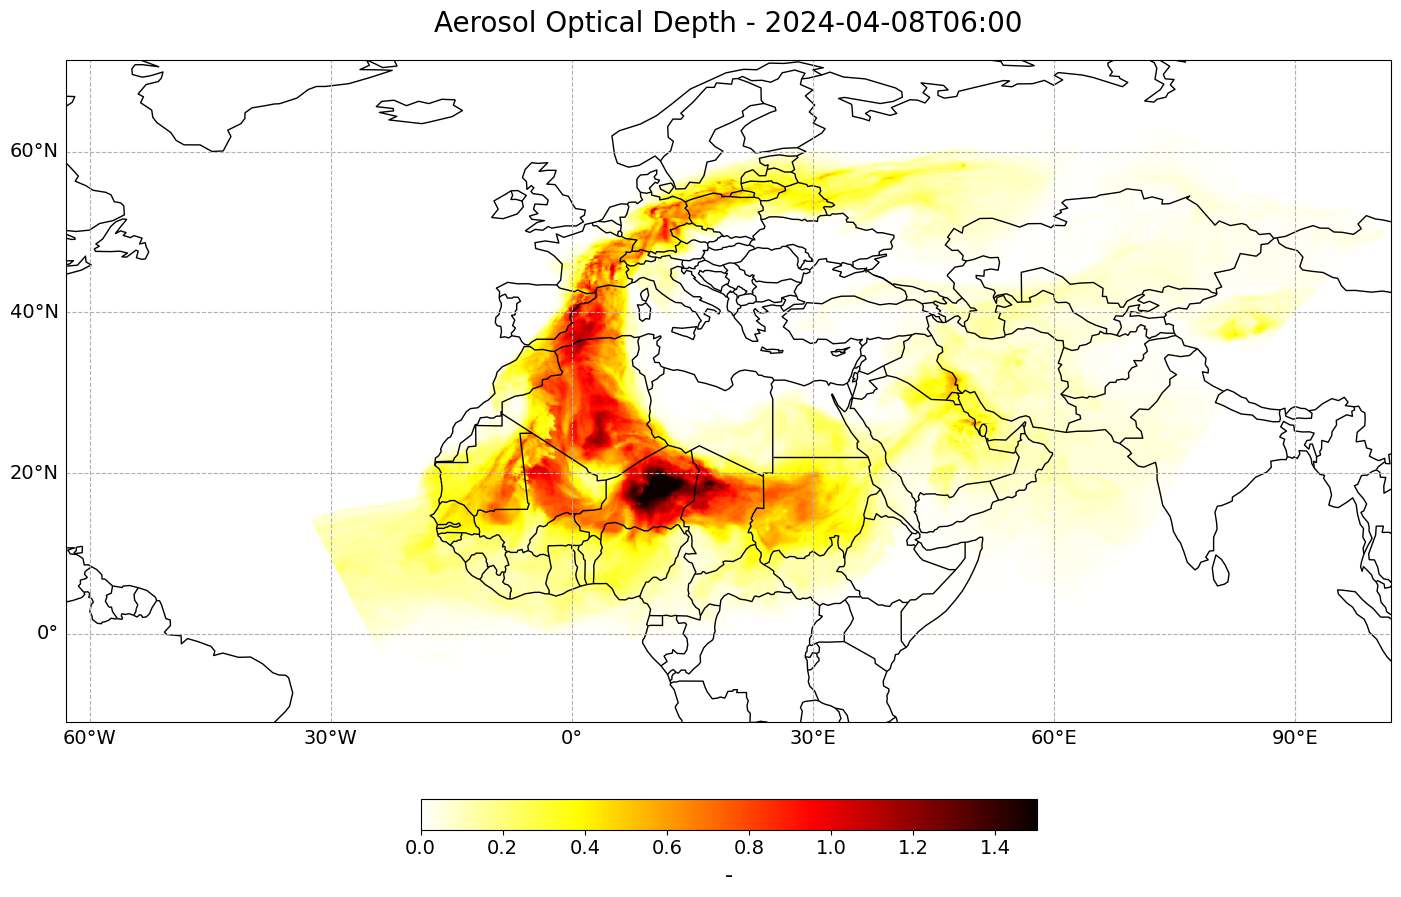

In [13]:
forecast_step = 6
visualize_pcolormesh(data_array=od_dust[forecast_step,:,:],
                     longitude=od_dust.lon,
                     latitude=od_dust.lat,
                     projection=ccrs.PlateCarree(),
                     color_scale='hot_r',
                     unit=units,
                     long_name='Aerosol Optical Depth - ' + str(od_dust[forecast_step,:,:].time.data)[0:16],
                     vmin=0, 
                     vmax=1.5,
                     set_global=False,
                     lonmin=longitude.min().data,
                     lonmax=longitude.max().data,
                     latmin=latitude.min().data,
                     latmax=latitude.max().data)

## Animate dust AOD forecasts

In the last step, you can animate the `Dust Aerosol Optical Depth` forecasts in order to see how the trace gas develops over a period of 3 days, from 7th April 2024 12 UTC to 10th April 2024.

You can do animations with matplotlib's function `animation`. Jupyter's function `HTML` can then be used to display HTML and video content.

The animation function consists of 4 parts:
- **Setting the initial state:**<br>
 Here, you define the general plot your animation shall use to initialise the animation. You can also define the number of frames (time steps) your animation shall have.
 
 
- **Functions to animate:**<br>
 An animation consists of three functions: `draw()`, `init()` and `animate()`. `draw()` is the function where individual frames are passed on and the figure is returned as image. In this example, the function redraws the plot for each time step. `init()` returns the figure you defined for the initial state. `animate()` returns the `draw()` function and animates the function over the given number of frames (time steps).
 
 
- **Create a `animate.FuncAnimation` object:** <br>
 The functions defined before are now combined to build an `animate.FuncAnimation` object.
 
 
- **Play the animation as video:**<br>
 As a final step, you can integrate the animation into the notebook with the `HTML` class. You take the generate animation object and convert it to a HTML5 video with the `to_html5_video` function

In [14]:
# Setting the initial state:
# 1. Define figure for initial plot
fig, ax = visualize_pcolormesh(data_array=od_dust[0,:,:],
                     longitude=od_dust.lon,
                     latitude=od_dust.lat,
                     projection=ccrs.PlateCarree(),
                     color_scale='hot_r',
                     unit=units,
                     long_name='Aerosol Optical Depth - ' + str(od_dust[0,:,:].time.data)[0:16],
                     vmin=0, 
                     vmax=1.5,
                     lonmin=longitude.min().data,
                     lonmax=longitude.max().data,
                     latmin=latitude.min().data,
                     latmax=latitude.max().data,
                     set_global=False)

frames = 24

def draw(i):
    img = plt.pcolormesh(od_dust.lon, 
                         od_dust.lat, 
                         od_dust[i,:,:], 
                         cmap='hot_r', 
                         transform=ccrs.PlateCarree(),
                         vmin=0,
                         vmax=1.5,
                         shading='auto')
    
    ax.set_title('Aerosol Optical Depth - '+ str(od_dust.time[i].data)[0:16], fontsize=20, pad=20.0)
    return img


def init():
    return fig


def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=800, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)

In [15]:
HTML(ani.to_html5_video())